## Cleitianne Oliveira Da Silva

### 1: 

Iniciando Algoritmo Genético...
Geração 1/100 - Melhor Custo: 320.00
Geração 10/100 - Melhor Custo: 320.00
Geração 20/100 - Melhor Custo: 320.00
Geração 30/100 - Melhor Custo: 320.00
Geração 40/100 - Melhor Custo: 320.00
Geração 50/100 - Melhor Custo: 320.00
Geração 60/100 - Melhor Custo: 320.00
Geração 70/100 - Melhor Custo: 320.00
Geração 80/100 - Melhor Custo: 320.00
Geração 90/100 - Melhor Custo: 320.00
Geração 100/100 - Melhor Custo: 320.00
Algoritmo Genético concluído.

--- Resultados da Missão (Algoritmo Genético) ---
Melhor Rota Encontrada: Base -> Radar -> Fábrica -> Porto -> Depósito -> Ponte -> Base
Custo Total da Melhor Rota: 320.00
Distância da Rota: 190 km
Combustível Necessário: 380.0 litros
Capacidade do Tanque: 500 litros
Distância Máxima Permitida: 250.0 km
Status do Combustível: VIÁVEL


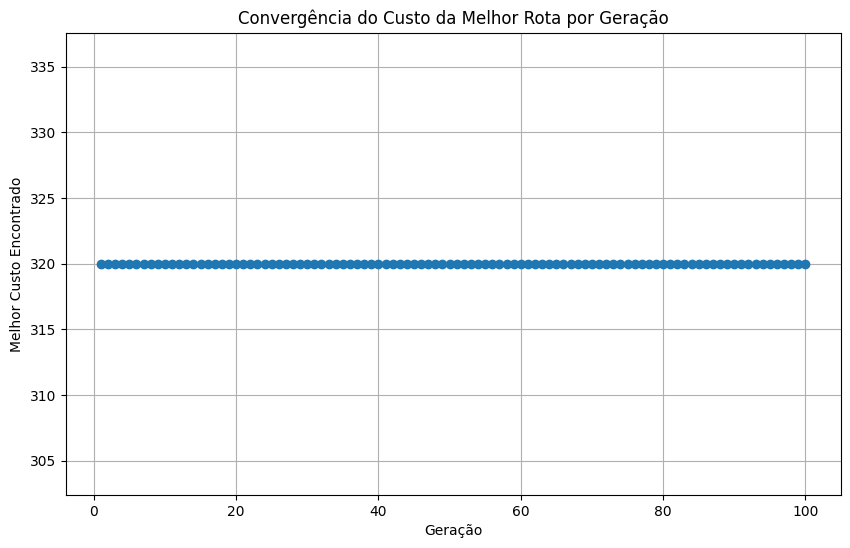

In [5]:
import random
import matplotlib.pyplot as plt

class MissaoAerea:
    def __init__(self):
        self.nomes_locais = ["Base", "Radar", "Ponte", "Depósito", "Porto", "Fábrica"]
        self.distancias = [
            [0,  45, 30, 50, 65, 40],  # Base
            [45, 0,  55, 40, 60, 35],  # Radar
            [30, 55, 0,  25, 40, 45],  # Ponte
            [50, 40, 25, 0,  30, 50],  # Depósito
            [65, 60, 40, 30, 0,  25],  # Porto
            [40, 35, 45, 50, 25, 0]   # Fábrica
        ]
        self.riscos_valores = [0, 8, 3, 5, 6, 4] # Base, Radar, Ponte, Depósito, Porto, Fábrica

        self.consumo_litros_km = 2
        self.capacidade_tanque_litros = 500
        self.max_distancia_km = self.capacidade_tanque_litros / self.consumo_litros_km

        self.indice_base = 0
        self.indices_alvos = [1, 2, 3, 4, 5]
        self.num_alvos = len(self.indices_alvos)

        soma_riscos_alvos_visitados = sum(self.riscos_valores[i] for i in self.indices_alvos)
        self.componente_custo_risco_fixo = soma_riscos_alvos_visitados * 5

    def _calcular_distancia_total(self, rota_indices):
        distancia_total = 0
        for i in range(len(rota_indices) - 1):
            ponto_de = rota_indices[i]
            ponto_para = rota_indices[i+1]
            distancia_total += self.distancias[ponto_de][ponto_para]
        return distancia_total

    def _calcular_custo_total(self, rota_indices):
        distancia_total = self._calcular_distancia_total(rota_indices)
        if distancia_total > self.max_distancia_km:
            return float('inf')
        custo_total = distancia_total + self.componente_custo_risco_fixo
        return custo_total
    #1.1.1 gerar_individuo(): Gera uma rota aleatória começando na base (índice 0)
    def gerar_individuo(self):
        alvos_embaralhados = random.sample(self.indices_alvos, len(self.indices_alvos))
        individuo = [self.indice_base] + alvos_embaralhados + [self.indice_base]
        return individuo
    # 1.1.2 calcular_fitness(): Fitness = 1 / Custo Total
    def calcular_fitness(self, individuo):
        custo_total = self._calcular_custo_total(individuo)
        if custo_total == float('inf') or custo_total == 0:
            return 0.0
        return 1.0 / custo_total
    # 1.1.3 crossover(): Implementar crossover preservando a base no início
    def crossover(self, pai1, pai2):
        alvos_pai1 = pai1[1:-1]
        alvos_pai2 = pai2[1:-1]
        tamanho_alvos = len(alvos_pai1)
        filho1_alvos = [None] * tamanho_alvos
        filho2_alvos = [None] * tamanho_alvos

        if tamanho_alvos < 2: 
            return list(pai1), list(pai2)

        ponto1, ponto2 = sorted(random.sample(range(tamanho_alvos), 2))
        
        filho1_alvos[ponto1:ponto2+1] = alvos_pai1[ponto1:ponto2+1]
        filho2_alvos[ponto1:ponto2+1] = alvos_pai2[ponto1:ponto2+1]

        idx_atual_pai2 = 0
        for i in range(tamanho_alvos):
            if filho1_alvos[i] is None:
                while alvos_pai2[idx_atual_pai2] in filho1_alvos[ponto1:ponto2+1]: # Garante que o gene não está no segmento copiado
                    idx_atual_pai2 = (idx_atual_pai2 + 1) % tamanho_alvos
                filho1_alvos[i] = alvos_pai2[idx_atual_pai2]
                idx_atual_pai2 = (idx_atual_pai2 + 1) % tamanho_alvos
        
        idx_atual_pai1 = 0
        for i in range(tamanho_alvos):
            if filho2_alvos[i] is None:
                while alvos_pai1[idx_atual_pai1] in filho2_alvos[ponto1:ponto2+1]: # Garante que o gene não está no segmento copiado
                    idx_atual_pai1 = (idx_atual_pai1 + 1) % tamanho_alvos
                filho2_alvos[i] = alvos_pai1[idx_atual_pai1]
                idx_atual_pai1 = (idx_atual_pai1 + 1) % tamanho_alvos
        
        filho1 = [self.indice_base] + filho1_alvos + [self.indice_base]
        filho2 = [self.indice_base] + filho2_alvos + [self.indice_base]
        
        return filho1, filho2
    #1.1.4 mutacao(): Implementar mutação sem mover a base 
    def mutacao(self, individuo, taxa_mutacao=0.1):
        if random.random() < taxa_mutacao:
            individuo_mutado = list(individuo)
            if self.num_alvos >= 2:
                idx1, idx2 = random.sample(range(1, len(individuo_mutado) - 1), 2)
                individuo_mutado[idx1], individuo_mutado[idx2] = individuo_mutado[idx2], individuo_mutado[idx1]
                return individuo_mutado
        return individuo
# --- Fim da Classe MissaoAerea ---

# --- Implementação do Algoritmo Genético ---

TAMANHO_POPULACAO = 50
NUM_GERACOES = 100
TAXA_MUTACAO = 0.1  # Probabilidade de um indivíduo sofrer mutação
TAXA_CROSSOVER = 0.8 # Probabilidade de dois pais realizarem crossover
TAMANHO_TORNEIO = 3  # Número de indivíduos em cada torneio de seleção
ELITISMO_COUNT = 1   # Quantos dos melhores indivíduos passam diretamente para a próxima geração

# Dicionário de Índices (conforme fornecido)
INDICES_NOMES = {
    0: "Base", 
    1: "Radar",
    2: "Ponte",
    3: "Depósito",
    4: "Porto",
    5: "Fábrica"
}


def selecionar_pai_torneio(populacao_avaliada, tamanho_torneio):
    """Seleciona um pai usando o método do torneio."""
    competidores = random.sample(populacao_avaliada, tamanho_torneio)
    competidores.sort(key=lambda x: x[1], reverse=True)
    return competidores[0][0] 

# Instanciar o problema
missao = MissaoAerea()

# 1. Inicializar População
populacao = [missao.gerar_individuo() for _ in range(TAMANHO_POPULACAO)]

historico_melhor_custo_geracao = []
melhor_rota_global = None
melhor_custo_global = float('inf')

print("Iniciando Algoritmo Genético...")
for geracao in range(NUM_GERACOES):
    populacao_avaliada = [] # Lista de (individuo, fitness)
    for individuo in populacao:
        fitness = missao.calcular_fitness(individuo)
        populacao_avaliada.append((individuo, fitness))

    # Ordenar a população por fitness (melhor para o pior)
    populacao_avaliada.sort(key=lambda x: x[1], reverse=True)

    # Atualizar melhor rota global encontrada até agora
    melhor_individuo_geracao = populacao_avaliada[0][0]
    custo_melhor_geracao = missao._calcular_custo_total(melhor_individuo_geracao)

    if custo_melhor_geracao < melhor_custo_global:
        melhor_rota_global = melhor_individuo_geracao
        melhor_custo_global = custo_melhor_geracao
    
    historico_melhor_custo_geracao.append(melhor_custo_global)

    if (geracao + 1) % 10 == 0 or geracao == 0: # Imprimir a cada 10 gerações
        print(f"Geração {geracao + 1}/{NUM_GERACOES} - Melhor Custo: {melhor_custo_global:.2f}")

    # 3. Seleção e Reprodução
    nova_populacao = []

    # Elitismo: os melhores indivíduos passam diretamente
    if ELITISMO_COUNT > 0:
        for i in range(ELITISMO_COUNT):
            nova_populacao.append(populacao_avaliada[i][0]) # Adiciona o indivíduo

    # Preencher o restante da nova população com filhos
    while len(nova_populacao) < TAMANHO_POPULACAO:
        # Selecionar pais
        pai1 = selecionar_pai_torneio(populacao_avaliada, TAMANHO_TORNEIO)
        pai2 = selecionar_pai_torneio(populacao_avaliada, TAMANHO_TORNEIO)

        # Crossover
        if random.random() < TAXA_CROSSOVER:
            filho1, filho2 = missao.crossover(pai1, pai2)
        else:
            # Se não houver crossover, os filhos são clones dos pais
            filho1, filho2 = list(pai1), list(pai2)

        # Mutação
        filho1 = missao.mutacao(filho1, TAXA_MUTACAO)
        filho2 = missao.mutacao(filho2, TAXA_MUTACAO)

        nova_populacao.append(filho1)
        if len(nova_populacao) < TAMANHO_POPULACAO: # Evitar exceder o tamanho da população
            nova_populacao.append(filho2)
    
    populacao = nova_populacao

print("Algoritmo Genético concluído.")

# --- Resultados ---
print("\n--- Resultados da Missão (Algoritmo Genético) ---")

# 1.2.1 Qual a melhor rota encontrada?
if melhor_rota_global:
    nomes_melhor_rota = [INDICES_NOMES[idx] for idx in melhor_rota_global]
    print(f"Melhor Rota Encontrada: {' -> '.join(nomes_melhor_rota)}")

    # 1.2.2 Qual o custo total dessa rota?
    print(f"Custo Total da Melhor Rota: {melhor_custo_global:.2f}")

    # 1.2.3 A missão é viável com o combustível disponível?
    distancia_da_melhor_rota = missao._calcular_distancia_total(melhor_rota_global)
    combustivel_necessario = distancia_da_melhor_rota * missao.consumo_litros_km
    print(f"Distância da Rota: {distancia_da_melhor_rota} km")
    print(f"Combustível Necessário: {combustivel_necessario:.1f} litros")
    print(f"Capacidade do Tanque: {missao.capacidade_tanque_litros} litros")
    print(f"Distância Máxima Permitida: {missao.max_distancia_km} km")

    if distancia_da_melhor_rota <= missao.max_distancia_km:
        print("Status do Combustível: VIÁVEL")
    else:
        print("Status do Combustível: INVIÁVEL (ERRO NA LÓGICA OU AG NÃO CONVERGIU BEM)")
else:
    print("Nenhuma rota válida foi encontrada pelo Algoritmo Genético.")


# 1.2.4. Plote o gráfico de custo.
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_GERACOES + 1), historico_melhor_custo_geracao, marker='o', linestyle='-')
plt.title('Convergência do Custo da Melhor Rota por Geração')
plt.xlabel('Geração')
plt.ylabel('Melhor Custo Encontrado')
plt.grid(True)
plt.show()

### 2: 

#### Problema Real Escolhido: 

Montar a escala de trabalho dos enfermeiros em um hospital.

#### Problemática:
- Precisa ter gente trabalhando o tempo todo em todas as áreas.
- Tem que respeitar as leis (horas de trabalho, folgas).
- Cada enfermeiro tem suas preferências e limites.
- Tem que ser justo com todo mundo (ninguém quer só turno ruim).
- O hospital quer gastar o mínimo possível.

#### Qual Ferramenta Usar? Algoritmos Genéticos (AG)
##### Por que Algoritmos Genéticos?
- Muitas Opções: Existem inúmeras formas de fazer uma escala, a depender do tamnho da equipe. AGs são bons para procurar em "mapas" gigantescos com muitas subidas e descidas até achar um caminho muito bom.
- Muitas Regras: AGs conseguem lidar com muitas regras ao mesmo tempo. A gente ensina o AG o que é uma "boa" escala (sem violar leis, cobrindo turnos) e o que é "ruim" (faltando gente, enfermeiro cansado).
- Acha Soluções Criativas: AGs misturam pedaços de escalas diferentes (como pais tendo filhos) e fazem pequenas mudanças (mutações), o que pode levar a soluções que a gente não pensaria sozinho.

#### Como o Algoritmo Genético Funcionaria (os Passos Principais):
- Ideias Iniciais (População): O AG cria um monte de escalas aleatórias (algumas boas, outras ruins).
- Nota da Escala (Fitness): Cada escala recebe uma nota: quanto melhor ela atende as regras e desejos, maior a nota. Escalas que quebram regras importantes ganham nota muito baixa.
- Escolher os Melhores (Seleção): O AG escolhe as escalas com as melhores notas para serem "pais".
- Misturar Ideias (Crossover): O AG pega duas escalas "pais" e mistura partes delas para criar duas escalas "filhas", como se fosse DNA. A ideia é que os filhos herdem as partes boas dos pais.
- Pequenas Mudanças (Mutação): As vezes, o AG faz uma pequena mudança aleatória em uma escala filha (tipo trocar um turno de um enfermeiro). Isso ajuda a não ficar preso nas mesmas ideias.
- Nova Geração: As escalas filhas (com algumas das melhores antigas para garantir) formam a nova "turma" de escalas.
- Repetir: O AG repete os passos 2 a 6 muitas vezes (centenas ou milhares). A cada "geração", as escalas tendem a ficar melhores.

#### Em resumo: 
Usaríamos Algoritmos Genéticos porque o problema de montar escalas é enorme e cheio de regras.